In [1]:
import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
import SHFunctions as shf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import os

# from jupyterthemes import jtplot
# jtplot.style(theme='solarizedl')

from IPython.core.display import display, HTML
np.set_printoptions(linewidth = 270)

C:\Users\MSI\AppData\Local\Temp\ipykernel_4196\912330876.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [18]:
# A, S = shf.MakeOneSingA(5, 8, delta = .00000)
# S = np.real(S)
delt = .0
m = 10
n = 6
A = shf.MakeGenSingA(m, n, delta = delt)

# A = np.load('200121_Coefficients.npy')

In [22]:
Ss = shf.NewtonPoly(A)

In [23]:
S0s = shf.NewtonPolyModified(A)

In [13]:
# X = np.random.random((10, 10))
X = np.zeros((10, 10))

In [14]:
time0 = time()
P_X = np.zeros((m**2, m**2))
for k in range(1,n+1):
    for l in range(k):
        P_X = P_X + np.kron(nla.matrix_power(X.transpose(),k-l-1), A[k,:,:] @ nla.matrix_power(X, l))
time0 = time() - time0
print(time0)

0.001998424530029297


In [15]:
time1 = time()
P_X1 = shf.Deriv_P(X, A)
time1 = time() - time1
print(time1)

0.0009968280792236328


In [16]:
nla.norm(P_X - P_X1)

0.0

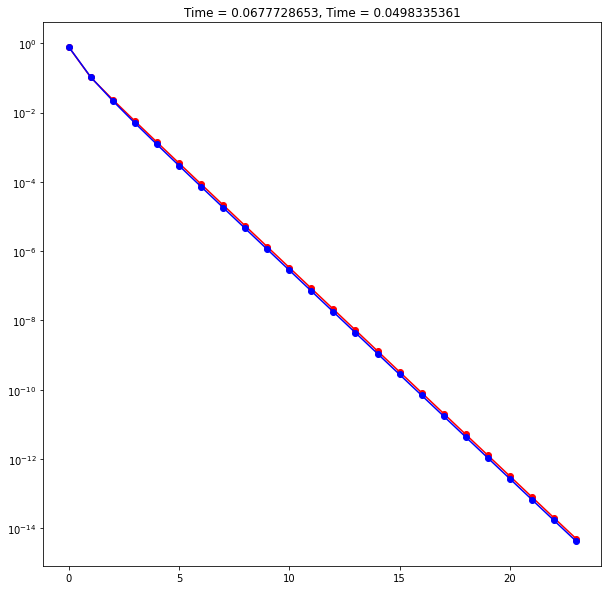

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Time = {:.10f}, Time = {:.10f}'.format(Ss['CalTime'], S0s['CalTime']))
ax.semilogy(Ss['errs'], '-or')
ax.semilogy(S0s['errs'], '-ob')

In [18]:
S = Ss['sol']
s = np.reshape(S, (np.prod(S.shape),), order='F')
P_S = Ss['P_Xs'][-1]
d, X = nla.eig(P_S)
imin = np.argmin(np.abs(d))
e = d[imin]
x = X[:,imin]
a = nla.inv(X) @ s
Pns = a[imin] * x

In [32]:
xx = np.real(np.reshape(np.sign(x[0])*x, S.shape, order = 'F'))
print('---------xx---------')
print(xx)
X0 = S - xx
print('---------X0---------')
print(X0)

P_X0 = np.zeros(P_S.shape)
for k in range(1, A.shape[0]):
    for l in range(k):
        P_X0 = P_X0 + np.kron(nla.matrix_power(X0.transpose(),k-l-1), A[k,:,:] @ nla.matrix_power(X0, l))
vP = np.reshape(shf.Pnomial(X0, A), m**2, 'F') # Reshape는 반드시 Fortran 방식으로
h = nla.solve(P_X0, vP)
H = np.reshape(h, S.shape, order = 'F')
X1 = X0 - H
x1s = np.reshape(S - X1, (np.prod(S.shape),), order='F')
x0s = np.reshape(S - X0, (np.prod(S.shape),), order='F')
a = nla.inv(X) @ x1s
a0 = nla.inv(X) @ x0s
Pnx1s = a[imin] * x
Pnx0s = a0[imin] * x
print('---------X1---------')
print(X1)
print('-------S - X1-------')
print(S - X1)
print('-----PN(S - X1)-----')
print(np.real(np.reshape(Pnx1s, S.shape, order='F')))
print('-------(S - X1) - PN(S - X1)-----')
print(S - X1 - np.real(np.reshape(Pnx1s, S.shape, order='F')))
print('-------||(S - X1) - PN(S - X1)||-----')
print(nla.norm(Pnx1s - x1s))
print('-------||(S - X0) - PN(S - X0)||-----')
print(nla.norm(Pnx0s - x0s))

---------xx---------
[[0.09775755 0.1066359  0.09833813 0.07956959 0.10833711 0.09053799 0.09296818 0.07977429 0.12286744 0.1141624 ]
 [0.09775755 0.1066359  0.09833813 0.07956959 0.10833711 0.09053799 0.09296818 0.07977429 0.12286744 0.1141624 ]
 [0.09775755 0.1066359  0.09833813 0.07956959 0.10833711 0.09053799 0.09296818 0.07977429 0.12286744 0.1141624 ]
 [0.09775755 0.1066359  0.09833813 0.07956959 0.10833711 0.09053799 0.09296818 0.07977429 0.12286744 0.1141624 ]
 [0.09775755 0.1066359  0.09833813 0.07956959 0.10833711 0.09053799 0.09296818 0.07977429 0.12286744 0.1141624 ]
 [0.09775755 0.1066359  0.09833813 0.07956959 0.10833711 0.09053799 0.09296818 0.07977429 0.12286744 0.1141624 ]
 [0.09775755 0.1066359  0.09833813 0.07956959 0.10833711 0.09053799 0.09296818 0.07977429 0.12286744 0.1141624 ]
 [0.09775755 0.1066359  0.09833813 0.07956959 0.10833711 0.09053799 0.09296818 0.07977429 0.12286744 0.1141624 ]
 [0.09775755 0.1066359  0.09833813 0.07956959 0.10833711 0.09053799 0.09296

### $\tilde{X}_{i}$가 $\mathcal{N}$에 들어가면, $\tilde{X}_{i+1}$도 $\mathcal{N}$에 들어가는 것으로 추정됨